In [20]:
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

df = pd.read_csv("metrics.csv") 


print(df.shape)
print(df.columns)
df.sample(2)

(13440, 14)
Index(['run_name', 'arc_features', 'arc_encoder_blocks', 'arc_num_params',
       'arc_latent_volume', 'arc_num_conv', 'arc_skip', 'test_swaps',
       'test_loss', 'test_F1', 'test_Accuracy', 'test_Accuracy_seq', 'name',
       'train_swaps'],
      dtype='object')


,run_name,arc_features,arc_encoder_blocks,arc_num_params,arc_latent_volume,arc_num_conv,arc_skip,test_swaps,test_loss,test_F1,test_Accuracy,test_Accuracy_seq,name,train_swaps
12102,nc_2_n4_3_n8_1_skip1_noise0.05-0.7,"[4, 4, 4, 4, 8]",4,1556,64.0,2,1,0.7,0.199093,0.475483,0.475483,0.0,nc_2_n4_3_n8_1_skip1_,0.05
92,nc_2_n4_1_n8_1_skip1_noise0.95-0.6,"[4, 4, 8]",2,980,256.0,2,1,0.6,0.147805,0.340043,0.340043,0.0,nc_2_n4_1_n8_1_skip1_,0.95


In [24]:

df["test_swaps"] = df["test_swaps"].astype(float)
df["train_swaps"] = df["train_swaps"].astype(float)
df['train_swaps'].unique()

array([0.95, 0.9 , 0.85, 0.8 , 0.75, 0.7 , 0.65, 0.6 , 0.55, 0.5 , 0.45,
       0.4 , 0.35, 0.3 , 0.25, 0.2 , 0.15, 0.1 , 0.05, 0.  ])

In [26]:
import numpy as np
# Redondear a 2 decimales y filtrar múltiplos de 0.1
valid_swaps = np.around(np.arange(0, 1.01, 0.1), 2)  # genera [0. , 0.1, ..., 1.0]
df = df[df['test_swaps'].round(2).isin(valid_swaps)]
df = df[df['train_swaps'].round(2).isin(valid_swaps)]

 
df['train_swaps'].unique()
df.to_csv("metrics2.csv", index=False)

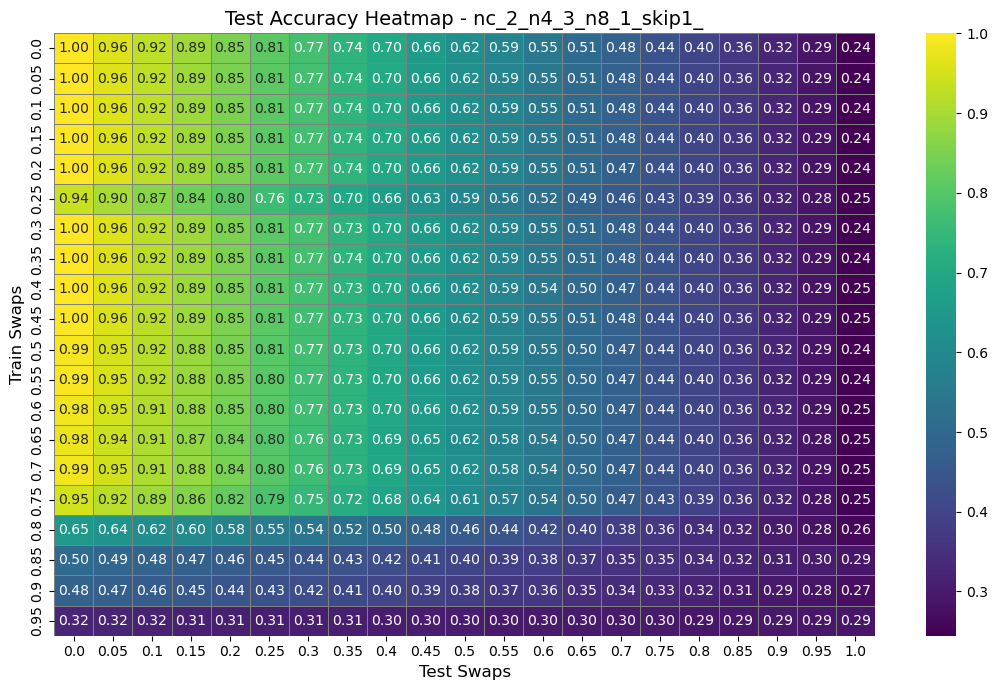

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Asegurar que los datos estén bien tipados
df["train_swaps"] = df["train_swaps"].astype(float)
df["test_swaps"] = df["test_swaps"].astype(float)
df["test_Accuracy"] = df["test_Accuracy"].astype(float)

# Obtener todos los run_names únicos
run_names = df['name'].unique()

# Crear un heatmap por cada run_name
run = next(iter(run_names))
sub_df = df[df['name'] == run]

# Agrupar por train_swaps y test_swaps, y promediar test_Accuracy
heatmap_data = sub_df.groupby(['train_swaps', 'test_swaps'])['test_Accuracy'].mean().reset_index()

# Crear matriz para heatmap
pivot_table = heatmap_data.pivot(index='train_swaps', columns='test_swaps', values='test_Accuracy')
pivot_table = pivot_table.sort_index(axis=0).sort_index(axis=1)

# Crear figura
plt.figure(figsize=(11, 7))
sns.heatmap(
    pivot_table,
    cmap="viridis",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    linecolor='gray',
    cbar=True
)

plt.title(f"Test Accuracy Heatmap - {run}", fontsize=14)
plt.xlabel("Test Swaps", fontsize=12)
plt.ylabel("Train Swaps", fontsize=12)
plt.tight_layout()
# plt.savefig(f'heatmaps/{run}heatmap.png')
plt.show()
plt.close()

In [3]:
!ls heatmaps

nc_1_n4_0_n8_0_skip0_heatmap.png  nc_2_n4_0_n8_0_skip0_heatmap.png
nc_1_n4_0_n8_0_skip1_heatmap.png  nc_2_n4_0_n8_0_skip1_heatmap.png
nc_1_n4_0_n8_1_skip0_heatmap.png  nc_2_n4_0_n8_1_skip0_heatmap.png
nc_1_n4_0_n8_1_skip1_heatmap.png  nc_2_n4_0_n8_1_skip1_heatmap.png
nc_1_n4_1_n8_0_skip0_heatmap.png  nc_2_n4_1_n8_0_skip0_heatmap.png
nc_1_n4_1_n8_0_skip1_heatmap.png  nc_2_n4_1_n8_0_skip1_heatmap.png
nc_1_n4_1_n8_1_skip0_heatmap.png  nc_2_n4_1_n8_1_skip0_heatmap.png
nc_1_n4_1_n8_1_skip1_heatmap.png  nc_2_n4_1_n8_1_skip1_heatmap.png
nc_1_n4_2_n8_0_skip0_heatmap.png  nc_2_n4_2_n8_0_skip0_heatmap.png
nc_1_n4_2_n8_0_skip1_heatmap.png  nc_2_n4_2_n8_0_skip1_heatmap.png
nc_1_n4_2_n8_1_skip0_heatmap.png  nc_2_n4_2_n8_1_skip0_heatmap.png
nc_1_n4_2_n8_1_skip1_heatmap.png  nc_2_n4_2_n8_1_skip1_heatmap.png
nc_1_n4_3_n8_0_skip0_heatmap.png  nc_2_n4_3_n8_0_skip0_heatmap.png
nc_1_n4_3_n8_0_skip1_heatmap.png  nc_2_n4_3_n8_0_skip1_heatmap.png
nc_1_n4_3_n8_1_skip0_heatmap.png  nc_2_n4_3_n8_1_skip0_heatmap

In [ ]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import matplotlib.image as mpimg

# Lista de posibles combinaciones
nc_values = ['1', '2']
n4_values = ['0', '1', '2', '3']
n8_values = ['0', '1']
skip_values = ['0', '1']

# Función para cargar y mostrar los heatmaps
def update_heatmap(nc, n4, n8):
    # Crear el nombre del archivo para skip=0
    file_name_skip0 = f"nc_{nc}_n4_{n4}_n8_{n8}_skip0_heatmap.png"
    # Crear el nombre del archivo para skip=1
    file_name_skip1 = f"nc_{nc}_n4_{n4}_n8_{n8}_skip1_heatmap.png"
    
    # Cargar las imágenes correspondientes
    img_skip0 = mpimg.imread(f"heatmaps2/{file_name_skip0}")
    img_skip1 = mpimg.imread(f"heatmaps2/{file_name_skip1}")
    
    # Crear la figura con 2 subgráficos (uno para skip=0 y otro para skip=1)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Mostrar la imagen para skip=0
    axes[0].imshow(img_skip0)
    axes[0].axis('off')  # Eliminar los ejes para mostrar solo la imagen
    axes[0].set_title(f'skip=0: nc={nc}, n4={n4}, n8={n8}')
    
    # Mostrar la imagen para skip=1
    axes[1].imshow(img_skip1)
    axes[1].axis('off')  # Eliminar los ejes para mostrar solo la imagen
    axes[1].set_title(f'skip=1: nc={nc}, n4={n4}, n8={n8}')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

# Crear los sliders interactivos
nc_slider = widgets.Dropdown(options=nc_values, description='nc:', value='1')
n4_slider = widgets.Dropdown(options=n4_values, description='n4:', value='0')
n8_slider = widgets.Dropdown(options=n8_values, description='n8:', value='0')

# Usar interact para vincular los sliders a la función
widgets.interactive(update_heatmap, nc=nc_slider, n4=n4_slider, n8=n8_slider)


interactive(children=(Dropdown(description='nc:', options=('1', '2'), value='1'), Dropdown(description='n4:', …